<a href="https://colab.research.google.com/github/rlaqhalx/machine_learning_study/blob/main/Single_variable_linear_regression_for_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!kaggle datasets download -d rsadiq/salary
!unzip salary.zip

  0% 0.00/392 [00:00<?, ?B/s]
100% 392/392 [00:00<00:00, 992kB/s]
Archive:  salary.zip
  inflating: Salary.csv              


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('Salary.csv')
df.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


(35, 2)


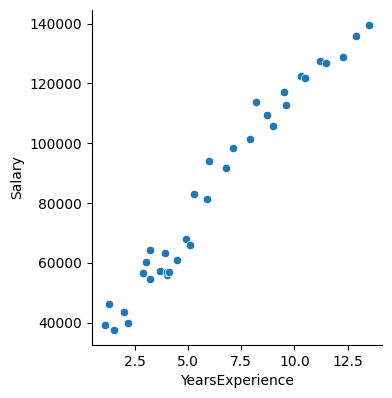

In [9]:
print(df.shape)
sns.pairplot(df, x_vars=['YearsExperience'], y_vars=['Salary'], height=4)

In [23]:
x_data = np.array(df[['YearsExperience']], dtype=np.float32)
y_data = np.array(df[['Salary']], dtype=np.float32)

# divide dataset into train & validation
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

# check shape of x_val, x_train and y_val, y_train
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

model = Sequential([
  Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01))

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100
)

(28, 1) (7, 1)
(28, 1) (7, 1)
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 8666161152.0000 - val_loss: 144186512.0000
Epoch 2/100
1/1 [==============================] - 0s 110ms/step - loss: 520563936.0000 - val_loss: 311872576.0000
Epoch 3/100
1/1 [==============================] - 0s 63ms/step - loss: 218535680.0000 - val_loss: 245430480.0000
Epoch 4/100
1/1 [==============================] - 0s 74ms/step - loss: 205775376.0000 - val_loss: 254775728.0000
Epoch 5/100
1/1 [==============================] - 0s 98ms/step - loss: 203697936.0000 - val_loss: 250787088.0000
Epoch 6/100
1/1 [==============================] - 0s 76ms/step - loss: 202029600.0000 - val_loss: 249411504.0000
Epoch 7/100
1/1 [==============================] - 0s 68ms/step - loss: 200391328.0000 - val_loss: 247557904.0000
Epoch 8/100
1/1 [==============================] - 0s 92ms/step - loss: 198769024.0000 - val_loss: 245815728.0000
Epoch 9/100
1/1 [==============================] - 0s 128m

1/1 [==============================] - 0s 72ms/step


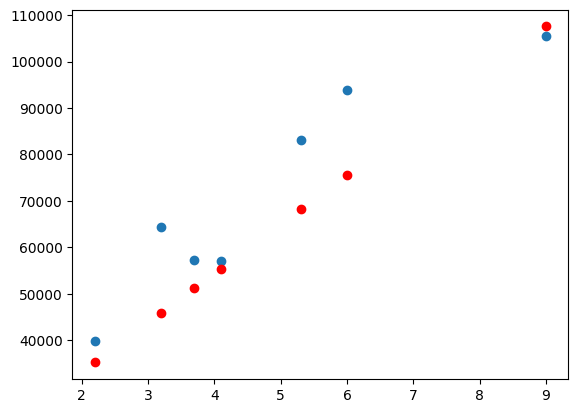

In [24]:
y_pred = model.predict(x_val)

plt.scatter(x_val, y_val)
plt.scatter(x_val, y_pred, color='r')
plt.show()